<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## preliminaries

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data_src = pd.read_pickle('alemPena-p2.pickle')

In [ ]:
# just checking
data_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GeneroReu           606 non-null    int64  
 1   Reclusao            606 non-null    int64  
 2   Detencao            606 non-null    int64  
 3   Multa               606 non-null    int64  
 4   CulpabCirc          606 non-null    int64  
 5   AntecedCirc         606 non-null    int64  
 6   CondSocialCirc      606 non-null    int64  
 7   PersonCirc          606 non-null    int64  
 8   MotivosCirc         606 non-null    int64  
 9   CircCrimeCirc       606 non-null    int64  
 10  ConseqCrimeCirc     606 non-null    int64  
 11  ComportVitimaCirc   606 non-null    int64  
 12  CircReincidencia    606 non-null    int64  
 13  PenaMinLegal        606 non-null    int64  
 14  Ano-norm            606 non-null    float64
 15  ReclusaoDias-norm   606 non-null    float64
 16  MultaD

## train-test split

In [ ]:
# other class to test: CondSocialCirc GeneroReu
classe = 'CondSocialCirc'

In [ ]:
X = data_src.drop(columns=[classe]).values
y = data_src[classe].values

In [ ]:
X.shape

(606, 29)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424, 29), (182, 29), (424,), (182,))

validacao de elementos unicos?

In [ ]:
_, counts_elements_train = np.unique(y_train, return_counts=True)
_, counts_elements_test = np.unique(y_test, return_counts=True)

In [ ]:
counts_elements_train

array([351,  73])

In [ ]:
counts_elements_test

array([151,  31])

## Chosing the best K values

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:

neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    train_accuracy[i] = model.score(X_train, y_train)

    test_accuracy[i] = model.score(X_test, y_test) 

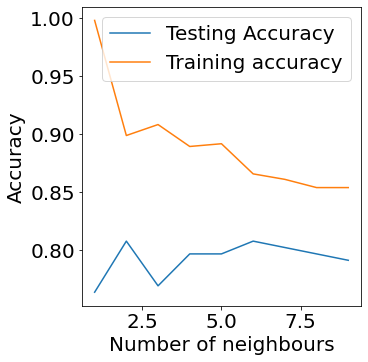

In [ ]:
#plt.title('k')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_accuracy

array([0.76373626, 0.80769231, 0.76923077, 0.7967033 , 0.7967033 ,
       0.80769231, 0.8021978 , 0.7967033 , 0.79120879])

K = 3 seems to be the best option, or k=5

## running kNN

In [ ]:
import sklearn

In [ ]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

In [ ]:
maxIter = 30
k=5
ext=[0.0]*maxIter
acc=[0.0]*maxIter
f1s=[0.0]*maxIter
mcc=[0.0]*maxIter

for i in range(maxIter):

    t0 = time.time()

    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    t1 = time.time()

    ext[i]=(t1-t0)
    acc[i] = metrics.accuracy_score(y_test, y_pred)
    f1s[i] = metrics.f1_score(y_test, y_pred)
    mcc[i] = metrics.matthews_corrcoef(y_test, y_pred)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

## performance evaluation

In [ ]:
print('KNN performance results for class',classe,'with k=',k)
print("ExecTime mean:",np.mean(ext))
print("Accuracy mean:",np.mean(acc))
print("F1-Score mean:",np.mean(f1s))
print("Matthews Correlation mean:",np.mean(mcc))

print("\nExecTime median:",np.median(ext))
print("Accuracy median:",np.median(acc))
print("F1-Score median:",np.median(f1s))
print("Matthews Correlation median:",np.median(mcc))

print("ExecTime Std:",np.std(ext))
print("Accuracy Std:",np.std(acc))
print("F1-Score Std:",np.std(f1s))
print("Matthews Correlation Std:",np.std(mcc))

KNN performance results for class CondSocialCirc with k= 5
ExecTime mean: 0.01178284486134847
Accuracy mean: 0.8351648351648353
F1-Score mean: 0.21052631578947364
Matthews Correlation mean: 0.21339465400830662

ExecTime median: 0.011203765869140625
Accuracy median: 0.8351648351648352
F1-Score median: 0.2105263157894737
Matthews Correlation median: 0.2133946540083067
ExecTime Std: 0.0014703161194802323
Accuracy Std: 1.1102230246251565e-16
F1-Score Std: 5.551115123125783e-17
Matthews Correlation Std: 8.326672684688674e-17


In [ ]:
print(ext, '\n', acc,'\n',f1s,'\n', mcc)

[0.015987873077392578, 0.01085352897644043, 0.011783123016357422, 0.0114898681640625, 0.013119697570800781, 0.010860204696655273, 0.01081228256225586, 0.011481523513793945, 0.010851383209228516, 0.012605428695678711, 0.0140380859375, 0.011058568954467773, 0.010709047317504883, 0.010902166366577148, 0.010803937911987305, 0.010798931121826172, 0.010978460311889648, 0.011002779006958008, 0.010841608047485352, 0.010752201080322266, 0.012341022491455078, 0.011375665664672852, 0.011178970336914062, 0.011150836944580078, 0.011479377746582031, 0.010791301727294922, 0.010758638381958008, 0.010785102844238281, 0.010965108871459961, 0.01074671745300293] 
 [0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.94

In [ ]:
metrics.confusion_matrix(y_test, y_pred).T

array([[148,  27],
       [  3,   4]])

In [ ]:
from matplotlib import rcParams
#import seaborn as sns

default_font_size = rcParams['font.size']
rcParams['font.size'] = 20
rcParams['axes.labelsize']=20
rcParams['axes.titlesize']=20
rcParams['figure.figsize'] =(5.0, 5.5)

# ['Male','Female','Other']
categ = ['No','Yes']

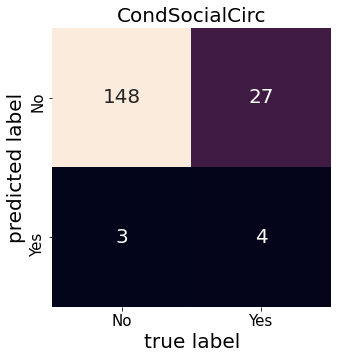

In [ ]:
mat = metrics.confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categ, yticklabels=categ)

plt.tick_params(labelsize=15)
plt.title(classe)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True)

Predicted,0,1,All
True,,,
0,0.939560,0.005495,0.945055
1,0.049451,0.005495,0.054945
All,0.989011,0.010989,1.000000


In [ ]:
#print(classification_report(y_test,y_pred))

## ROC Curve

search or discard??

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)


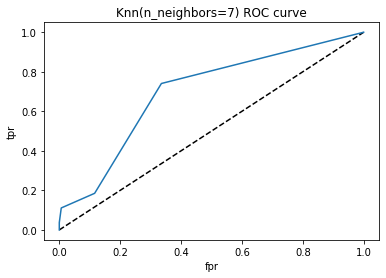

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve

metrics.roc_auc_score(y_test,y_pred_proba)

0.6966547192353644

## Hyperparameter tuning

search or dicard??

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,25)}


In [ ]:
knn = KNeighborsClassifier(metric='euclidean')
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_


0.9339926839181685

In [ ]:
knn_cv.best_params_


{'n_neighbors': 6}